In [139]:
import os
import glob

In [140]:
def process_bin_output(input_file, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    
    cardinalities = []
    
    with open(input_file, "r") as infile:
        for line in infile:
            parts = line.strip().split("; Cardinality: ")
            if len(parts) != 2:
                continue  # Skip malformed lines
            
            bin_part, cardinality = parts

            bin_name, genomes = bin_part.split(":")
            bin_index = bin_name.replace("Bin ", "").strip()
            genome_list = genomes.split(",")
            
            # Write genomes to bin_{i}.txt
            if int(bin_index) <10:
                bin_file = os.path.join(output_dir, f"bin_0{bin_index}.txt")
            else:
                bin_file = os.path.join(output_dir, f"bin_{bin_index}.txt")
            with open(bin_file, "w") as bf:
                bf.write("\n".join(genome_list) + "\n")
            
            # Collect cardinalities
            cardinalities.append(cardinality)
    
    # Write bin cardinalities to bin_cardinalities.txt
    cardinality_file = os.path.join(output_dir, "bin_cardinalities.txt")
    with open(cardinality_file, "w") as cf:
        cf.write("\n".join(cardinalities) + "\n")

In [141]:
# Example usage
process_bin_output("data/tuber_bin_assignment_balancing.txt", "output/tuber_bin_packing_balancing")

In [142]:
def read_bins(bin_dir="output"):
    """
    Reads bin_{i}.txt files and bin_cardinalities.txt, returning lists of genome bins and cardinalities.

    :param bin_dir: Directory containing the bin files.
    :return: (bins, cardinalities) where:
             - bins is a list of lists, each sublist contains genome names for a bin.
             - cardinalities is a list of integers representing the cardinality of each bin.
    """
    # Read bin files
    bin_files = sorted(glob.glob(os.path.join(bin_dir, "bin_*.txt")))  # Sorted to maintain order
    bins = []
    
    for bin_file in bin_files:
        with open(bin_file, "r") as f:
            genomes = [line.strip() for line in f if line.strip()]  # Remove empty lines
            bins.append(genomes)

    # Read cardinalities
    cardinalities_file = os.path.join(bin_dir, "bin_cardinalities.txt")
    cardinalities = []
    
    if os.path.exists(cardinalities_file):
        with open(cardinalities_file, "r") as f:
            cardinalities = [float(line.strip()) for line in f if line.strip()]  # Convert to int

    return bins, cardinalities

In [143]:
bins, cardinalities = read_bins('output/myco_tuberculosis_full_661k_bin_assignment//')
# Print results for verification
for i, (genomes, card) in enumerate(zip(bins, cardinalities)):
    print(f"Bin {i}: {len(genomes)} | Cardinality: {card}")

Bin 0: 5543 | Cardinality: 249169312.0
Bin 1: 3055 | Cardinality: 250181632.0
Bin 2: 1064 | Cardinality: 249103312.0
Bin 3: 3395 | Cardinality: 247919184.0
Bin 4: 5133 | Cardinality: 248579504.0
Bin 5: 4607 | Cardinality: 243864448.0
Bin 6: 2995 | Cardinality: 243635024.0
Bin 7: 1604 | Cardinality: 244797056.0
Bin 8: 3597 | Cardinality: 243636544.0
Bin 9: 6154 | Cardinality: 247802896.0
Bin 10: 1988 | Cardinality: 244158272.0
Bin 11: 5507 | Cardinality: 244466464.0
Bin 12: 2967 | Cardinality: 247615968.0
Bin 13: 1118 | Cardinality: 172241536.0


In [144]:
bins, cardinalities = read_bins('output/tuber_bin_packing_64MB//')
# Print results for verification
for i, (genomes, card) in enumerate(zip(bins, cardinalities)):
    print(f"Bin {i}: {len(genomes)} | Cardinality: {card}")

Bin 0: 1540 | Cardinality: 151588896.0
Bin 1: 5020 | Cardinality: 151534752.0
Bin 2: 1799 | Cardinality: 152965504.0
Bin 3: 591 | Cardinality: 152247184.0
Bin 4: 707 | Cardinality: 151801312.0
Bin 5: 1988 | Cardinality: 151624704.0
Bin 6: 4253 | Cardinality: 152337232.0
Bin 7: 1662 | Cardinality: 152706448.0
Bin 8: 3008 | Cardinality: 151595696.0
Bin 9: 1855 | Cardinality: 152921712.0
Bin 10: 2441 | Cardinality: 152568368.0
Bin 11: 1392 | Cardinality: 152412864.0
Bin 12: 905 | Cardinality: 151594976.0
Bin 13: 1013 | Cardinality: 151538176.0
Bin 14: 2376 | Cardinality: 152152176.0
Bin 15: 1354 | Cardinality: 152428608.0
Bin 16: 6124 | Cardinality: 152475280.0
Bin 17: 825 | Cardinality: 151807520.0
Bin 18: 674 | Cardinality: 151536608.0
Bin 19: 4874 | Cardinality: 152212768.0
Bin 20: 1369 | Cardinality: 151471920.0
Bin 21: 1924 | Cardinality: 151480144.0
Bin 22: 752 | Cardinality: 151911824.0
Bin 23: 281 | Cardinality: 40132584.0


In [145]:
nb_of_genomes = []
cards = []
for i, (genomes, card) in enumerate(zip(bins, cardinalities)):
    nb_of_genomes = nb_of_genomes + [len(genomes)]
    cards = cards + [card]

In [146]:
nb_of_genomes

[1540,
 5020,
 1799,
 591,
 707,
 1988,
 4253,
 1662,
 3008,
 1855,
 2441,
 1392,
 905,
 1013,
 2376,
 1354,
 6124,
 825,
 674,
 4874,
 1369,
 1924,
 752,
 281]

In [147]:
cards

[151588896.0,
 151534752.0,
 152965504.0,
 152247184.0,
 151801312.0,
 151624704.0,
 152337232.0,
 152706448.0,
 151595696.0,
 152921712.0,
 152568368.0,
 152412864.0,
 151594976.0,
 151538176.0,
 152152176.0,
 152428608.0,
 152475280.0,
 151807520.0,
 151536608.0,
 152212768.0,
 151471920.0,
 151480144.0,
 151911824.0,
 40132584.0]

In [148]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

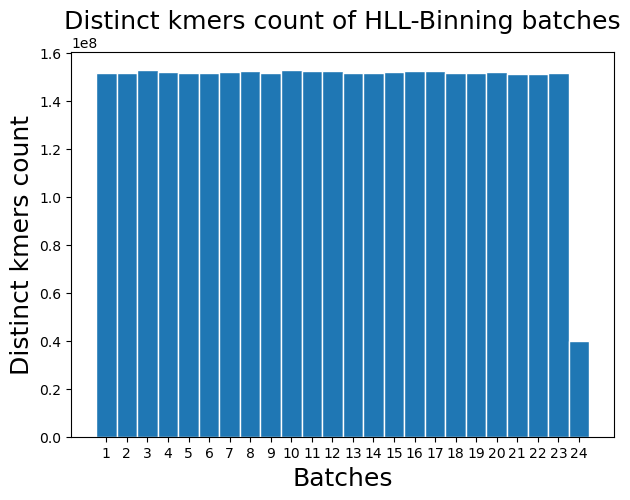

In [185]:
fig, ax = plt.subplots(figsize=(7, 5))

df_plot = cards

files = range(1,len(cards)+1)
sizes = cards
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

# ax.bar(files, counts, label=bar_labels, color=bar_colors)
ax.bar(files, sizes,width=1, ec = 'white')

ax.set_ylabel('Distinct kmers count',fontsize = 18)
ax.set_title('Distinct kmers count of HLL-Binning batches',fontsize = 18)
ax.set_xlabel('Batches',fontsize = 18)
plt.xticks(range(1,len(cards)+1))

plt.show()

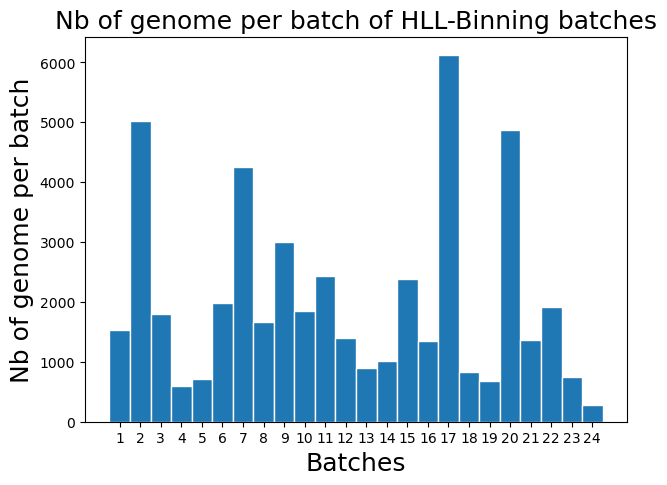

In [183]:
fig, ax = plt.subplots(figsize=(7, 5))

df_plot = nb_of_genomes

files = range(1,len(nb_of_genomes)+1)
sizes = nb_of_genomes
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

# ax.bar(files, counts, label=bar_labels, color=bar_colors)
ax.bar(files, sizes,width=1, ec = 'white')

ax.set_ylabel('Nb of genome',fontsize = 18)
ax.set_title('Nb of genome per batch of HLL-Binning batches',fontsize = 18)
ax.set_xlabel('Batches',fontsize = 18)
plt.xticks(range(1,len(cards)+1))
plt.show()

In [167]:
bins1, cardinalities1 = read_bins('output/tuber_bin_packing_balancing/')

In [168]:
nb_of_genomes_1 = []
cards_1 = []
for i, (genomes, card) in enumerate(zip(bins1, cardinalities1)):
    nb_of_genomes_1 = nb_of_genomes_1 + [len(genomes)]
    cards_1 = cards_1 + [card]

In [169]:
nb_of_genomes_1,cards_1

([1419,
  1806,
  2038,
  2712,
  2786,
  1684,
  1849,
  1665,
  1257,
  1754,
  1645,
  2084,
  2042,
  2885,
  2276,
  2374,
  1754,
  2500,
  1931,
  2768,
  1644,
  1577,
  2144,
  2133],
 [193044928.0,
  192820592.0,
  193994400.0,
  193509264.0,
  196133616.0,
  193758128.0,
  194696432.0,
  198745728.0,
  194960560.0,
  196639936.0,
  195454272.0,
  193425712.0,
  196804304.0,
  195380128.0,
  195052592.0,
  193790032.0,
  193006352.0,
  199818736.0,
  194467344.0,
  194789152.0,
  193536656.0,
  197270304.0,
  194652752.0,
  194806320.0])

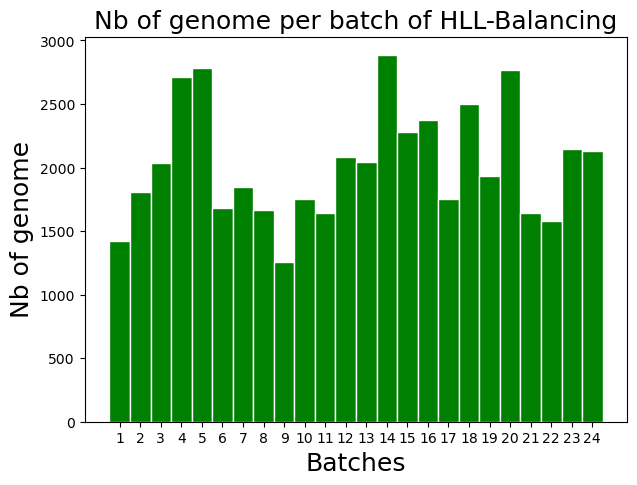

In [186]:
fig, ax = plt.subplots(figsize=(7, 5))

df_plot = nb_of_genomes_1

files = range(1,len(nb_of_genomes_1)+1)
sizes = nb_of_genomes_1
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

# ax.bar(files, counts, label=bar_labels, color=bar_colors)
ax.bar(files, sizes,width=1, ec = 'white',color='green')

ax.set_ylabel('Nb of genome',fontsize = 18)
ax.set_title('Nb of genome per batch of HLL-Balancing',fontsize = 18)
ax.set_xlabel('Batches',fontsize = 18)
plt.xticks(range(1,len(cards)+1))
plt.show()

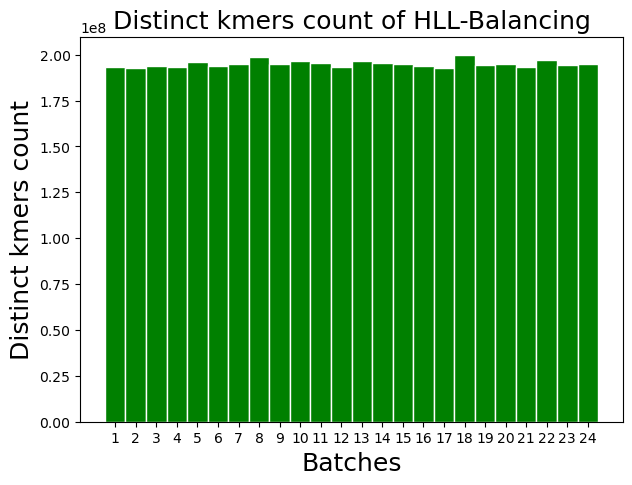

In [187]:
fig, ax = plt.subplots(figsize=(7, 5))

df_plot = cards_1

files = range(1,len(cards_1)+1)
sizes = cards_1
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

# ax.bar(files, counts, label=bar_labels, color=bar_colors)
ax.bar(files, sizes,width=1, ec = 'white',color = 'green')

ax.set_ylabel('Distinct kmers count',fontsize = 18)
ax.set_title('Distinct kmers count of HLL-Balancing',fontsize = 18)
ax.set_xlabel('Batches',fontsize = 18)
plt.xticks(range(1,len(cards)+1))

plt.show()

In [119]:
import os
import argparse
import glob

In [131]:
def find_genome_paths(genome_folder):
    """
    Recursively finds all genome files (*.fa) and maps genome names to their full paths.

    :param genome_folder: Root folder where genome files are stored.
    :return: Dictionary {genome_name: full_path}
    """
    genome_paths = {}
    for file_path in glob.iglob(os.path.join(genome_folder, "**", "*.fa"), recursive=True):
        genome_name = os.path.basename(file_path).split(".")[0]  # Extract genome name
        genome_paths[genome_name] = os.path.abspath(file_path)  # Store full path
    return genome_paths

def process_text_files(input_folder, genome_folder, output_folder):
    """
    Reads input text files, replaces genome names with their full paths, and saves results.

    :param input_folder: Folder containing text files with genome names.
    :param genome_folder: Folder containing genome files (*.fa) in subdirectories.
    :param output_folder: Folder where output text files will be saved.
    """
    os.makedirs(output_folder, exist_ok=True)

    # Get genome paths mapping
    genome_paths = find_genome_paths(genome_folder)

    # Process each text file
    for text_file in glob.glob(os.path.join(input_folder, "*.txt")):
        output_file = os.path.join(output_folder, os.path.basename(text_file))

        with open(text_file, "r") as infile, open(output_file, "w") as outfile:
            for line in infile:
                genome_name = line.strip()
                genome_path = genome_paths.get(genome_name, "NOT_FOUND")
                outfile.write(f"{genome_path}\n")

        print(f"Processed: {text_file} -> {output_file}")

In [132]:
process_text_files('output/tuber_bin_packing_64MB/', '/Users/ktruong/data/661k/mycobacterium_tuberculosis/', 'data/tuber_hll-binning_full_genome_path')

Processed: output/tuber_bin_packing_64MB/bin_16.txt -> data/tuber_hll-binning_full_genome_path/bin_16.txt
Processed: output/tuber_bin_packing_64MB/bin_02.txt -> data/tuber_hll-binning_full_genome_path/bin_02.txt
Processed: output/tuber_bin_packing_64MB/bin_03.txt -> data/tuber_hll-binning_full_genome_path/bin_03.txt
Processed: output/tuber_bin_packing_64MB/bin_17.txt -> data/tuber_hll-binning_full_genome_path/bin_17.txt
Processed: output/tuber_bin_packing_64MB/bin_01.txt -> data/tuber_hll-binning_full_genome_path/bin_01.txt
Processed: output/tuber_bin_packing_64MB/bin_15.txt -> data/tuber_hll-binning_full_genome_path/bin_15.txt
Processed: output/tuber_bin_packing_64MB/bin_14.txt -> data/tuber_hll-binning_full_genome_path/bin_14.txt
Processed: output/tuber_bin_packing_64MB/bin_00.txt -> data/tuber_hll-binning_full_genome_path/bin_00.txt
Processed: output/tuber_bin_packing_64MB/bin_04.txt -> data/tuber_hll-binning_full_genome_path/bin_04.txt
Processed: output/tuber_bin_packing_64MB/bin_1

In [133]:
process_text_files('output/tuber_bin_packing_balancing//', '/Users/ktruong/data/661k/mycobacterium_tuberculosis/', 'data/tuber_hll-balancing_full_genome_path')

Processed: output/tuber_bin_packing_balancing/bin_16.txt -> data/tuber_hll-balancing_full_genome_path/bin_16.txt
Processed: output/tuber_bin_packing_balancing/bin_02.txt -> data/tuber_hll-balancing_full_genome_path/bin_02.txt
Processed: output/tuber_bin_packing_balancing/bin_03.txt -> data/tuber_hll-balancing_full_genome_path/bin_03.txt
Processed: output/tuber_bin_packing_balancing/bin_17.txt -> data/tuber_hll-balancing_full_genome_path/bin_17.txt
Processed: output/tuber_bin_packing_balancing/bin_01.txt -> data/tuber_hll-balancing_full_genome_path/bin_01.txt
Processed: output/tuber_bin_packing_balancing/bin_15.txt -> data/tuber_hll-balancing_full_genome_path/bin_15.txt
Processed: output/tuber_bin_packing_balancing/bin_14.txt -> data/tuber_hll-balancing_full_genome_path/bin_14.txt
Processed: output/tuber_bin_packing_balancing/bin_00.txt -> data/tuber_hll-balancing_full_genome_path/bin_00.txt
Processed: output/tuber_bin_packing_balancing/bin_04.txt -> data/tuber_hll-balancing_full_genome

In [134]:
process_text_files('/Users/ktruong/data/phylo_order/', '/Users/ktruong/data/661k/mycobacterium_tuberculosis/', 
                   '/Users/ktruong/data/tuber_hll-binning_full_genome_path_final')

Processed: /Users/ktruong/data/phylo_order/phylo_order_2.txt -> /Users/ktruong/data/tuber_hll-binning_full_genome_path_final/phylo_order_2.txt
Processed: /Users/ktruong/data/phylo_order/phylo_order_3.txt -> /Users/ktruong/data/tuber_hll-binning_full_genome_path_final/phylo_order_3.txt
Processed: /Users/ktruong/data/phylo_order/phylo_order_1.txt -> /Users/ktruong/data/tuber_hll-binning_full_genome_path_final/phylo_order_1.txt
Processed: /Users/ktruong/data/phylo_order/phylo_order_4.txt -> /Users/ktruong/data/tuber_hll-binning_full_genome_path_final/phylo_order_4.txt
Processed: /Users/ktruong/data/phylo_order/phylo_order_5.txt -> /Users/ktruong/data/tuber_hll-binning_full_genome_path_final/phylo_order_5.txt
Processed: /Users/ktruong/data/phylo_order/phylo_order_7.txt -> /Users/ktruong/data/tuber_hll-binning_full_genome_path_final/phylo_order_7.txt
Processed: /Users/ktruong/data/phylo_order/phylo_order_6.txt -> /Users/ktruong/data/tuber_hll-binning_full_genome_path_final/phylo_order_6.txt

In [135]:
process_text_files('/Users/ktruong/data/phylo_order_balancing/', '/Users/ktruong/data/661k/mycobacterium_tuberculosis/', 
                   '/Users/ktruong/data/tuber_hll-balancing_full_genome_path_final')

Processed: /Users/ktruong/data/phylo_order_balancing/phylo_order_2.txt -> /Users/ktruong/data/tuber_hll-balancing_full_genome_path_final/phylo_order_2.txt
Processed: /Users/ktruong/data/phylo_order_balancing/phylo_order_3.txt -> /Users/ktruong/data/tuber_hll-balancing_full_genome_path_final/phylo_order_3.txt
Processed: /Users/ktruong/data/phylo_order_balancing/phylo_order_1.txt -> /Users/ktruong/data/tuber_hll-balancing_full_genome_path_final/phylo_order_1.txt
Processed: /Users/ktruong/data/phylo_order_balancing/phylo_order_4.txt -> /Users/ktruong/data/tuber_hll-balancing_full_genome_path_final/phylo_order_4.txt
Processed: /Users/ktruong/data/phylo_order_balancing/phylo_order_5.txt -> /Users/ktruong/data/tuber_hll-balancing_full_genome_path_final/phylo_order_5.txt
Processed: /Users/ktruong/data/phylo_order_balancing/phylo_order_7.txt -> /Users/ktruong/data/tuber_hll-balancing_full_genome_path_final/phylo_order_7.txt
Processed: /Users/ktruong/data/phylo_order_balancing/phylo_order_6.txt

In [157]:
import pandas as pd
import numpy as np

In [158]:
compressed_size_binning = pd.read_csv("./data/csv/files_size_tuber_binning.csv",header=None, sep = "\t", names = ['size_Mb','name'], index_col = 'name')
compressed_size_binning = compressed_size_binning.drop('total')